
<pre>
   __  ______  ____  ___    _   _______ ____  ________________________  __
  / / / / __ \/ __ )/   |  / | / / ___// __ \/ ____/  _/ ____/_  __/\ \/ /
 / / / / /_/ / __  / /| | /  |/ /\__ \/ / / / /    / // __/   / /    \  / 
/ /_/ / _, _/ /_/ / ___ |/ /|  /___/ / /_/ / /____/ // /___  / /     / /  
\____/_/ |_/_____/_/  |_/_/ |_//____/\____/\____/___/_____/ /_/     /_/   
                                                                          
</pre>
<p>
<b>Department:</b> Urbansociety Research

<b>Clearance:</b> Unrestricted - 0

<b>Description:</b> Image classification model that can read handwritten digits using Googles TensorFlow modules and the DeepAI MNIST dataset. See https://en.wikipedia.org/wiki/Artificial_neural_network for more information on neural networks.

<b>License:</b> MIT License

    Copyright (c) 2021 Urbansociety

    Permission is hereby granted, free of charge, to any person obtaining a copy
    of this software and associated documentation files (the "Software"), to deal
    in the Software without restriction, including without limitation the rights
    to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
    copies of the Software, and to permit persons to whom the Software is
    furnished to do so, subject to the following conditions:

    The above copyright notice and this permission notice shall be included in all
    copies or substantial portions of the Software.

    THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
    IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
    FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
    AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
    LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
    OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE
    SOFTWARE.

<b>Dependencies:</b>
    
    Python 3.9.7    -   For more information visit https://www.python.org<br>
    TensorFlow      -   For more information visit https://www.tensorflow.org<br>
    Keras           -   For more information visit https://keras.io<br>
    Matplotlib      -   For more information visit https://matplotlib.org<br>

<b>Datasets:</b>
    
    MNIST Dataset   -   For more information visit https://deepai.org/dataset/mnist

<b>Tested platforms:</b>

	Linux:

		Fedora 34	-	For more information visit https://getfedora.org/


</p>

<h3>Import modules</h3>

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt

<h3>Download the dataset</h3>

In [2]:
# Download the OpenAI MNIST dataset
mnist=tf.keras.datasets.mnist

# Prepare the data and split it into a train and a test dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

<h3>Look at the first image</h3>

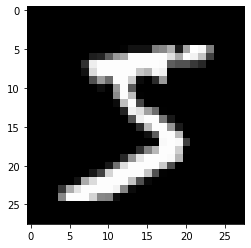

In [3]:
# Look at the first image
x_train[0].shape
first_image=x_train[0]

# Show the image in grayscale
plt.imshow(first_image, cmap='gray')

<h3>Create the neural network</h3>

In [4]:
# Create the neural network
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=[28,28]), # For the neural net we need a list of values not a matrix
    tf.keras.layers.Dense(128, activation='relu'), # A dense layer is the same as a fully connected layer or the linear layer in pytorch
    tf.keras.layers.Dropout(0.2), # Dropout means some of the outputs of the dense layer will be set to zero so that the network doesn't learn all the images by heart
    tf.keras.layers.Dense(10) # Output layer. There are 10 outputs for 10 classes
])

2021-10-06 21:43:56.284655: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2021-10-06 21:43:56.308629: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2021-10-06 21:43:56.309726: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


<h3>Make a prediction on the untrained model</h3>

In [5]:
# Make a prediction for the first image
predictions = model(x_train[:1]).numpy()

# Show prediction as probability
tf.nn.softmax(predictions).numpy()

array([[0.07924489, 0.09139222, 0.0696773 , 0.16694754, 0.10660441,
        0.09405775, 0.15975605, 0.04279941, 0.07556552, 0.11395483]],
      dtype=float32)

<h3>Create a loss function</h3>

In [6]:
# Create a loss function
loss_fn=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
loss_fn(y_train[:1], predictions).numpy()
model.compile(optimizer='adam',
                loss=loss_fn,
                metrics=['accuracy']
)

<h3>Train the model</h3>

In [7]:
# Train the model to reduce loss for a fixed number of epochs
model.fit(x_train, y_train, epochs=50)

2021-10-06 21:44:14.789051: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2021-10-06 21:44:14.804028: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 1800055000 Hz


Epoch 1/50
1875/1875 [==============================] - 35s 17ms/step - loss: 0.4763 - accuracy: 0.8625
Epoch 2/50
1875/1875 [==============================] - 36s 19ms/step - loss: 0.1527 - accuracy: 0.9565
Epoch 3/50
1875/1875 [==============================] - 42s 22ms/step - loss: 0.1105 - accuracy: 0.9665
Epoch 4/50
1875/1875 [==============================] - 27s 14ms/step - loss: 0.0920 - accuracy: 0.9711
Epoch 5/50
1875/1875 [==============================] - 27s 14ms/step - loss: 0.0781 - accuracy: 0.9763
Epoch 6/50
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0664 - accuracy: 0.9792
Epoch 7/50
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0555 - accuracy: 0.9824
Epoch 8/50
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0527 - accuracy: 0.9823
Epoch 9/50
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0487 - accuracy: 0.9837
Epoch 10/50
1875/1875 [==============================] - 15s 8ms/st

<h3>Evaluate the trained Model</h3>

In [8]:
# Show information about the test set
x_test.shape

# Evaluate the model to see how accurate it predicts the integers in the test set
model.evaluate(x_test, y_test, verbose=2)

313/313 - 2s - loss: 0.1258 - accuracy: 0.9803


[0.1258234679698944, 0.9803000092506409]

<h3>Test the trained Model</h3>

[Prediction]: The image is a 7


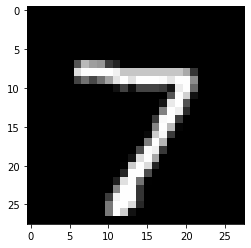

In [9]:
# Show the first test image in grayscale
test_image=x_test[0]
plt.imshow(test_image, cmap='gray')

# Make prediction for the image
predictions = model(x_test[:1]).numpy()
highest_index=0
for x in tf.nn.softmax(predictions):
    for i,y in enumerate(x):
        if(y>x[highest_index]):
            highest_index=i
print(f"[Prediction]: The image is a {highest_index}")